<a href="https://colab.research.google.com/github/Achint-7/Exploratory-Data-Analysis/blob/main/21BDS0190_EDA_Chapter5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv'
df = pd.read_csv(url)
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [11]:
# Replace '?' with NaN in the entire dataset
df.replace('?', np.nan, inplace=True)

# Convert the relevant columns to numeric, forcing errors to NaN for non-numeric columns
numeric_columns_to_fill = [
    'Formation Energy (eV)',
    'E Above Hull (eV)',
    'Band Gap (eV)',
    'Nsites',
    'Density (gm/cc)',
    'Volume'
]

df[numeric_columns_to_fill] = df[numeric_columns_to_fill].apply(pd.to_numeric, errors='coerce')

# Convert the relevant columns to numeric, forcing errors to NaN for non-numeric columns
df[numeric_columns_to_fill] = df[numeric_columns_to_fill].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the mean for specific numeric columns
for column in numeric_columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)  # Fill NaN with mean in the specified columns

# Display the first few rows of the cleaned data
df.head()

<ipython-input-11-9c1eb7ffcf61>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)  # Fill NaN with mean in the specified columns


,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [13]:
# Selecting the numeric columns for clustering
numeric_columns = df[['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume']]

# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

#K-Means Clustering

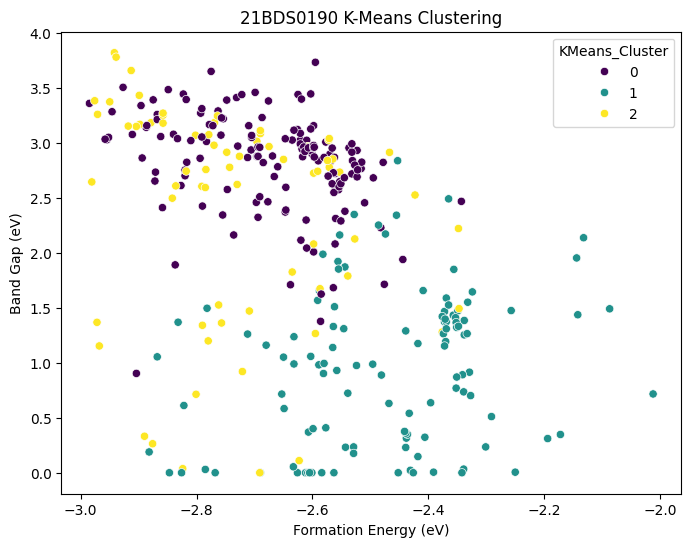

21BDS0190 Silhouette Score for K-Means: 0.30020367177735247


In [14]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # We can experiment with different n_clusters
kmeans.fit(scaled_data)
df['KMeans_Cluster'] = kmeans.labels_

# Visualize K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Formation Energy (eV)'], y=df['Band Gap (eV)'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('21BDS0190 K-Means Clustering')
plt.show()

# Evaluate the silhouette score for K-Means
sil_score = silhouette_score(scaled_data, kmeans.labels_)
print(f'21BDS0190 Silhouette Score for K-Means: {sil_score}')


#Spectral Clustering with Minimum Spanning Tree (MST)

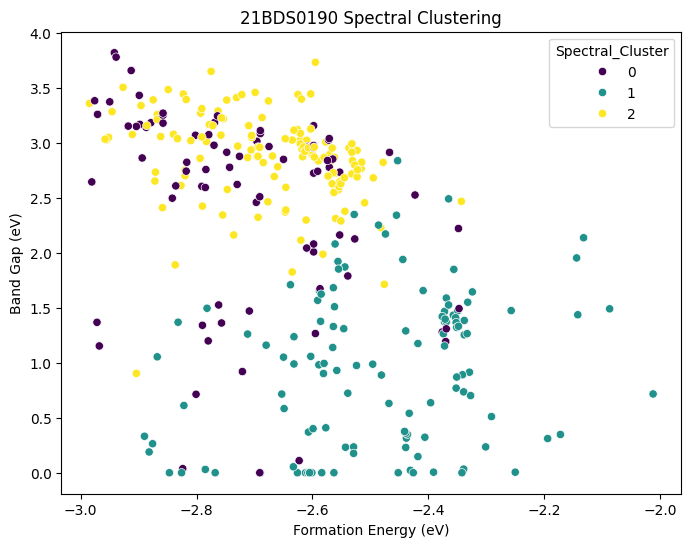

21BDS0190 Silhouette Score for Spectral Clustering: 0.2888190543912108


In [15]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
df['Spectral_Cluster'] = spectral.fit_predict(scaled_data)

# Visualize Spectral Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Formation Energy (eV)'], y=df['Band Gap (eV)'], hue=df['Spectral_Cluster'], palette='viridis')
plt.title('21BDS0190 Spectral Clustering')
plt.show()

# Evaluate the silhouette score for Spectral Clustering
sil_score_spectral = silhouette_score(scaled_data, df['Spectral_Cluster'])
print(f'21BDS0190 Silhouette Score for Spectral Clustering: {sil_score_spectral}')


#Hierarchical Clustering

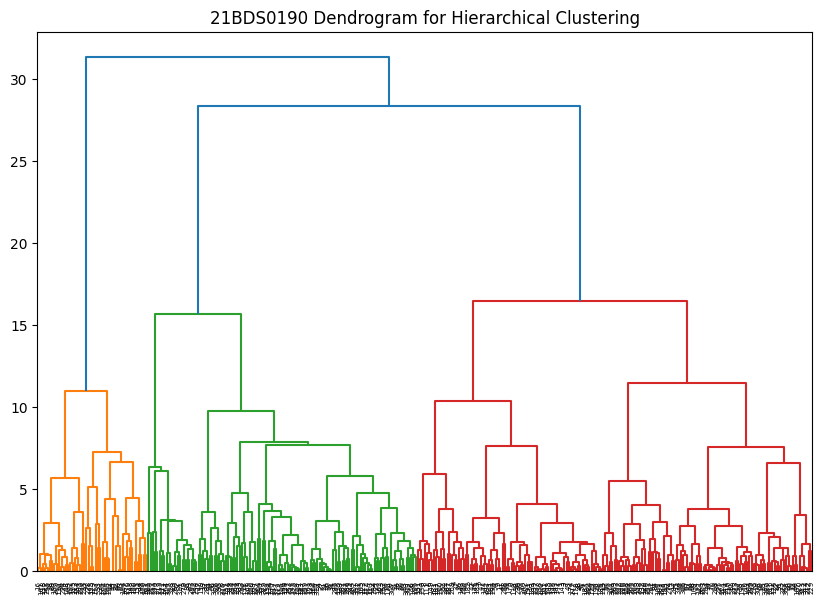

In [16]:
# Hierarchical Clustering (Linkage)
linked = linkage(scaled_data, 'ward')  # 'ward' minimizes the variance of merged clusters

# Plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('21BDS0190 Dendrogram for Hierarchical Clustering')
plt.show()

# Agglomerative Clustering

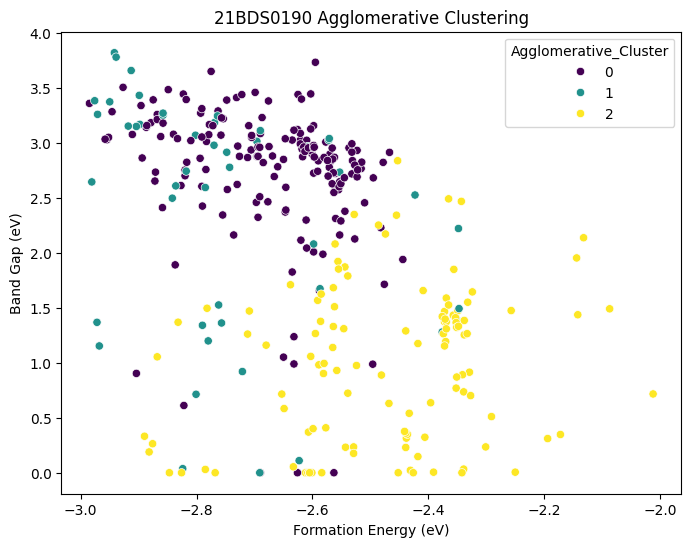

21BDS0190 Silhouette Score for Agglomerative Clustering: 0.2674917845652283


In [17]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Agglomerative_Cluster'] = agg_clustering.fit_predict(scaled_data)

# Visualize Agglomerative Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Formation Energy (eV)'], y=df['Band Gap (eV)'], hue=df['Agglomerative_Cluster'], palette='viridis')
plt.title('21BDS0190 Agglomerative Clustering')
plt.show()

# Evaluate the silhouette score for Agglomerative Clustering
sil_score_agg = silhouette_score(scaled_data, df['Agglomerative_Cluster'])
print(f'21BDS0190 Silhouette Score for Agglomerative Clustering: {sil_score_agg}')

#DBSCAN Clustering

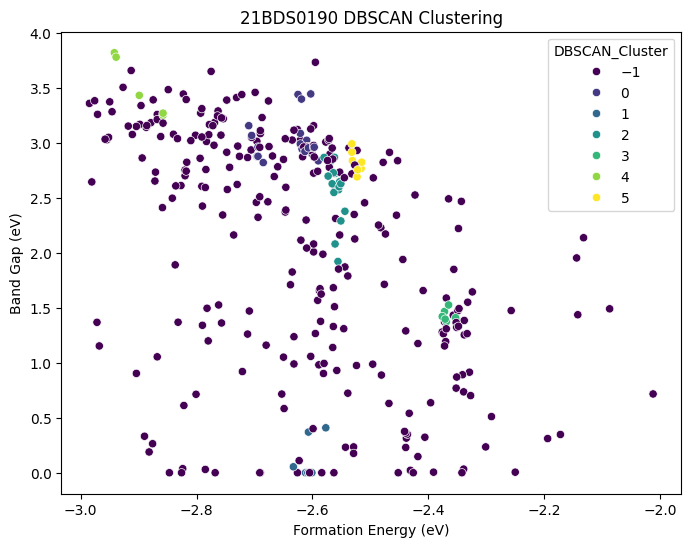

21BDS0190 Silhouette Score for DBSCAN: -0.2583801590661045


In [18]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Visualize DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Formation Energy (eV)'], y=df['Band Gap (eV)'], hue=df['DBSCAN_Cluster'], palette='viridis')
plt.title('21BDS0190 DBSCAN Clustering')
plt.show()

# Evaluate the silhouette score for DBSCAN
sil_score_dbscan = silhouette_score(scaled_data, df['DBSCAN_Cluster'])
print(f'21BDS0190 Silhouette Score for DBSCAN: {sil_score_dbscan}')
